In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('/content/heart_disease_uci.csv')


# **Data Cleaning**

In [19]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


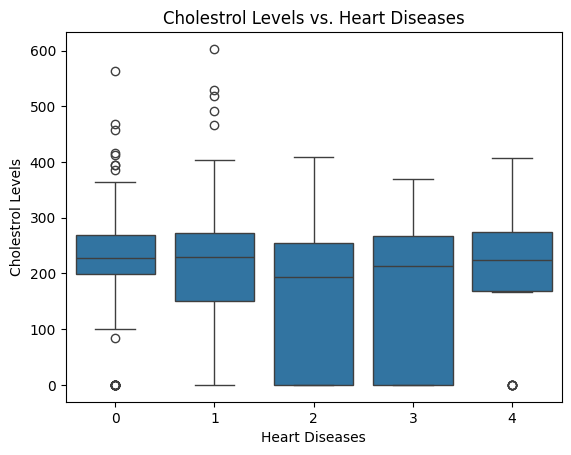

In [20]:
sns.boxplot(df, x='num', y= 'chol')
plt.title('Cholestrol Levels vs. Heart Diseases')
plt.xlabel("Heart Diseases")
plt.ylabel('Cholestrol Levels')
plt.show()

<Axes: xlabel='trestbps'>

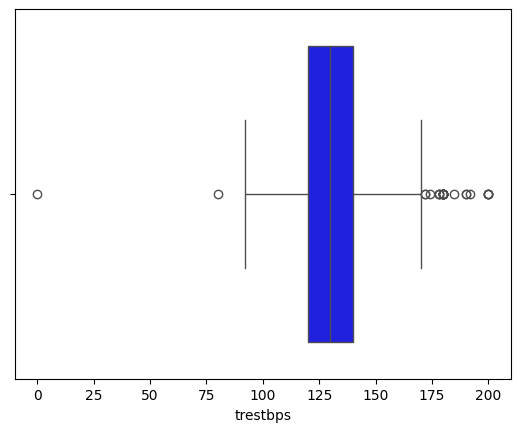

In [21]:
sns.boxplot(x=df['trestbps'], color ='blue' )

<Axes: xlabel='age'>

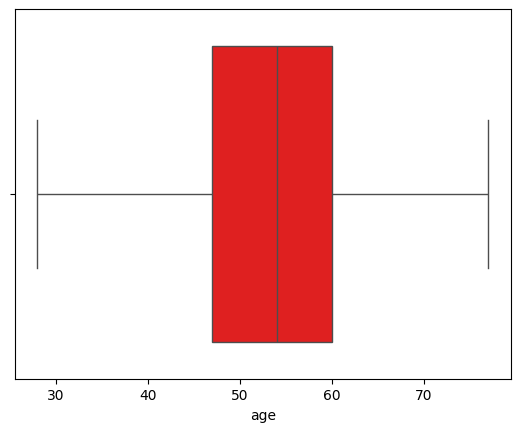

In [22]:
sns.boxplot(x=df['age'],color='red')

Handle Inappropriate Zeros

In [24]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


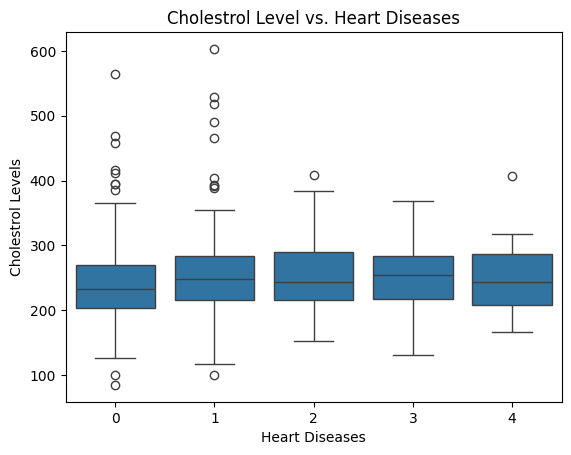

In [25]:
sns.boxplot(df, x='num', y= 'chol')
plt.title('Cholestrol Level vs. Heart Diseases')
plt.xlabel('Heart Diseases')
plt.ylabel('Cholestrol Levels')
#plt.xticks([0,1,2,3,4], ['Nai', 'olpo ase', 'ase', 'beshi', 'voyaboho'])
plt.show()

# Fill in missing values

In [26]:
# for numeric columns: we use median valuues to fill (impute) missing value

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# for categoric values we use the most frequent values to fill missing data
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [27]:
df.drop(['ca'], axis = 1, inplace=True)

In [28]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [29]:
df2 = pd.read_csv('/content/heart_disease_uci.csv')

In [30]:
df2['ca'].fillna(df2['ca'].median(), inplace= True)

In [31]:
df2.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca            0
thal        486
num           0
dtype: int64

# Data Transform

Label Encoding The Categorical Values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 107.9+ KB


In [33]:
columns_to_encode = ['thal', 'dataset', 'slope', 'sex', 'num', 'cp', 'restecg', 'fbs', 'exang']

label_encoders = {}

for col in columns_to_encode:
  # Create a new LabelEncoder
  le = LabelEncoder()

  # fit and transform the data
  df[col] = le.fit_transform(df[col])

  # store the encoder for Later
  label_encoders[col] = le

In [34]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


Transform the numeric columns

In [35]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[[col]])

  min_max_scalers[col] = scaler

In [36]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,0.714286,1,0,3,0.541667,0.285714,1,0,0.633803,0,0.556818,0,0,0
1,2,0.795918,1,0,0,0.666667,0.388031,0,0,0.338028,1,0.465909,1,1,2
2,3,0.795918,1,0,0,0.333333,0.277992,0,0,0.485915,1,0.590909,1,2,1
3,4,0.183673,1,0,2,0.416667,0.318533,0,1,0.894366,0,0.693182,0,1,0
4,5,0.265306,0,0,1,0.416667,0.229730,0,0,0.788732,0,0.454545,2,1,0


In [37]:
df.describe()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,0.520630,0.789130,1.238043,0.782609,0.434475,0.309310,0.150000,0.990217,0.547130,0.366304,0.392416,1.152174,1.158696,0.995652
std,265.725422,0.192341,0.408148,1.130673,0.956350,0.149415,0.099972,0.357266,0.631863,0.177079,0.482056,0.120233,0.516007,0.483493,1.142693
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,0.387755,1.000000,0.000000,0.000000,0.333333,0.256274,0.000000,1.000000,0.422535,0.000000,0.295455,1.000000,1.000000,0.000000
50%,460.500000,0.530612,1.000000,1.000000,0.000000,0.416667,0.298263,0.000000,1.000000,0.563380,0.000000,0.352273,1.000000,1.000000,1.000000
75%,690.250000,0.653061,1.000000,2.000000,2.000000,0.500000,0.351351,0.000000,1.000000,0.676056,1.000000,0.465909,1.000000,1.000000,2.000000
max,920.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000


In [41]:
# data = [1, 4, 7, 10, 100]

# # sample transformation
# # for x in data:
# #   x = x/max
# #   print(x)


# # prev_min = 1
# # prev_max = 100

# # min= 0
# # max= 1

In [42]:

X = df[['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']]

y = df['num']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
